In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy, torch
from torch import nn,optim
plt.rcParams.update({'font.size': 14})
figure_folder = 'WH-figures/'

#follow the intruction in deepSI on github to install our preliminary toolbox
import deepSI

## Load Wiener-Hammerstein (WH) data

see: https://sites.google.com/view/nonlinear-benchmark/benchmarks/wiener-hammerstein?authuser=0

In [2]:
train, test = deepSI.datasets.WienerHammerBenchMark(split_data=True) #will download the dataset into C:/Users/user/AppData/Local/deepSI/data_sets
print('train =',train, train.y.shape, train.u.shape) #training and validation is combined into one training set
print('test =',test, test.y.shape, test.u.shape)

train = System_data of length: 100000 nu=None ny=None normed=False (100000,) (100000,)
test = System_data of length: 78800 nu=None ny=None normed=False (78800,) (78800,)


## Fit/load state-space encoder model

In [3]:
if True: #train model
    sys = deepSI.fit_systems.System_encoder(nx=6,na=50,nb=50) #load the encoder system
    sys.n_hidden_layers = 1
    sys.n_nodes_per_layer = 15
    sys.fit(train, epochs=4000, batch_size=1024, Loss_kwargs=dict(nf=80), sim_val=train[-20000:]) #can be stopped early with keyboard
    #nf = number of steps in each encoder mutiple schooting section (T in the paper)
    sys.save_system('./WH-data/nx6WH-encoder')
    sim_val = train[-40_000:] #larger validation set
    sys.bestfit = sys.apply_experiment(sim_val).NRMS(sim_val) #reset checkpoint
    #use all the data for final local minima search
    sys.fit(train, epochs=500 ,batch_size=10**10, Loss_kwargs=dict(nf=80), sim_val=sim_val) 
    sys.save_system('./WH-data/nx6WH-encoder-stepped')
else: #load model from file
    sys = deepSI.load_system('./WH-data/nx6WH-encoder-stepped')

########## new best ########### 1.1419269700718808
N_training_samples=99871, batch_size=1024, N_batch_updates_per_epoch=97


  0%|          | 0/4000 [00:00<?, ?it/s]

########## new best ########### 0.7293688560787519
Epoch:    1 Training loss:  0.9422 Validation loss = 0.7294, time Loss: 30.8%, back: 30.3%, val: 36.2%
########## new best ########### 0.313923136220541
Epoch:    2 Training loss:  0.2355 Validation loss = 0.3139, time Loss: 31.2%, back: 30.3%, val: 35.9%
########## new best ########### 0.2179184204256538
Epoch:    3 Training loss: 0.06813 Validation loss = 0.2179, time Loss: 31.5%, back: 30.4%, val: 35.4%
########## new best ########### 0.12091346722033165
Epoch:    4 Training loss: 0.02676 Validation loss = 0.1209, time Loss: 31.6%, back: 30.4%, val: 35.4%
########## new best ########### 0.10587108444389494
Epoch:    5 Training loss: 0.01294 Validation loss = 0.1059, time Loss: 31.6%, back: 30.4%, val: 35.4%
########## new best ########### 0.09968857410493408
Epoch:    6 Training loss: 0.01052 Validation loss = 0.09969, time Loss: 31.6%, back: 30.4%, val: 35.4%
########## new best ########### 0.09461095444716446
Epoch:    7 Training 

########## new best ########### 0.05207053429238509
Epoch:   61 Training loss: 0.002936 Validation loss = 0.05207, time Loss: 31.9%, back: 30.6%, val: 34.9%
Epoch:   62 Training loss: 0.002883 Validation loss = 0.05304, time Loss: 31.9%, back: 30.6%, val: 34.9%
Epoch:   63 Training loss: 0.002744 Validation loss = 0.05241, time Loss: 31.9%, back: 30.7%, val: 34.9%
########## new best ########### 0.050763330426269175
Epoch:   64 Training loss: 0.002765 Validation loss = 0.05076, time Loss: 31.9%, back: 30.6%, val: 34.9%
Epoch:   65 Training loss: 0.00269 Validation loss = 0.05117, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch:   66 Training loss: 0.002752 Validation loss = 0.05228, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch:   67 Training loss: 0.002573 Validation loss = 0.05327, time Loss: 31.9%, back: 30.7%, val: 34.9%
########## new best ########### 0.04995869409330206
Epoch:   68 Training loss: 0.002476 Validation loss = 0.04996, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoc

Epoch:  129 Training loss: 0.001584 Validation loss = 0.03967, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  130 Training loss: 0.001583 Validation loss = 0.04041, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  131 Training loss: 0.001593 Validation loss = 0.04062, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.03730117861219639
Epoch:  132 Training loss: 0.001552 Validation loss = 0.0373, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  133 Training loss: 0.001603 Validation loss = 0.0457, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  134 Training loss: 0.001521 Validation loss = 0.04201, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  135 Training loss: 0.001528 Validation loss = 0.04013, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  136 Training loss: 0.001583 Validation loss = 0.04041, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  137 Training loss: 0.001562 Validation loss = 0.03946, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch

########## new best ########### 0.03032988355659657
Epoch:  202 Training loss: 0.001025 Validation loss = 0.03033, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  203 Training loss: 0.001061 Validation loss = 0.03441, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.03016122881262773
Epoch:  204 Training loss: 0.001023 Validation loss = 0.03016, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  205 Training loss: 0.001006 Validation loss = 0.03045, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  206 Training loss: 0.001067 Validation loss = 0.03085, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.029697253123744285
Epoch:  207 Training loss: 0.0009925 Validation loss = 0.0297, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  208 Training loss: 0.001016 Validation loss = 0.03014, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.02929084880000473
Epoch:  209 Training loss: 0.001067 Validation loss = 0.

########## new best ########### 0.019589027459725773
Epoch:  270 Training loss: 0.0005039 Validation loss = 0.01959, time Loss: 31.8%, back: 30.6%, val: 34.9%
Epoch:  271 Training loss: 0.0005379 Validation loss = 0.02042, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  272 Training loss: 0.0004559 Validation loss = 0.02259, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  273 Training loss: 0.0005064 Validation loss = 0.01967, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  274 Training loss: 0.0004633 Validation loss = 0.02127, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.018889385708277404
Epoch:  275 Training loss: 0.0005143 Validation loss = 0.01889, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  276 Training loss: 0.0004536 Validation loss = 0.02097, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  277 Training loss: 0.0004643 Validation loss = 0.02161, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  278 Training loss: 0.0005569 Validatio

Epoch:  342 Training loss: 0.0003404 Validation loss = 0.01889, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  343 Training loss: 0.0003079 Validation loss = 0.02947, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  344 Training loss: 0.0003203 Validation loss = 0.01634, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  345 Training loss: 0.0003669 Validation loss = 0.01804, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  346 Training loss: 0.000264 Validation loss = 0.0171, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  347 Training loss: 0.0003159 Validation loss = 0.03626, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  348 Training loss: 0.0003014 Validation loss = 0.01706, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  349 Training loss: 0.0003066 Validation loss = 0.02898, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  350 Training loss: 0.0002976 Validation loss = 0.01631, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.01480625016631

Epoch:  415 Training loss: 0.0002251 Validation loss = 0.01476, time Loss: 31.8%, back: 30.6%, val: 34.9%
Epoch:  416 Training loss: 0.0002725 Validation loss = 0.01404, time Loss: 31.8%, back: 30.6%, val: 34.9%
Epoch:  417 Training loss: 0.0002159 Validation loss = 0.01744, time Loss: 31.8%, back: 30.6%, val: 34.9%
Epoch:  418 Training loss: 0.000275 Validation loss = 0.01497, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  419 Training loss: 0.0002297 Validation loss = 0.0252, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  420 Training loss: 0.0003013 Validation loss = 0.01715, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  421 Training loss: 0.0002015 Validation loss = 0.01694, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  422 Training loss: 0.0002904 Validation loss = 0.02051, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  423 Training loss: 0.000209 Validation loss = 0.0134, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  424 Training loss: 0.0002941 Validation lo

Epoch:  490 Training loss: 0.0002204 Validation loss = 0.01707, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  491 Training loss: 0.000203 Validation loss = 0.01449, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  492 Training loss: 0.0002149 Validation loss = 0.01463, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  493 Training loss: 0.0002278 Validation loss = 0.01238, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  494 Training loss: 0.0002226 Validation loss = 0.01219, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  495 Training loss: 0.0001822 Validation loss = 0.01203, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  496 Training loss: 0.0002719 Validation loss = 0.01262, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  497 Training loss: 0.0001799 Validation loss = 0.01328, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  498 Training loss: 0.0002047 Validation loss = 0.01255, time Loss: 31.8%, back: 30.6%, val: 35.0%
########## new best ########### 0.0118391853483

########## new best ########### 0.011069404987750484
Epoch:  565 Training loss: 0.0001648 Validation loss = 0.01107, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  566 Training loss: 0.0001688 Validation loss = 0.01125, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  567 Training loss: 0.000206 Validation loss = 0.01192, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  568 Training loss: 0.0001768 Validation loss = 0.01828, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  569 Training loss: 0.0001928 Validation loss = 0.01339, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  570 Training loss: 0.000171 Validation loss = 0.02696, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  571 Training loss: 0.0001982 Validation loss = 0.01355, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  572 Training loss: 0.0001848 Validation loss = 0.01244, time Loss: 31.8%, back: 30.6%, val: 35.0%
########## new best ########### 0.011053590386579795
Epoch:  573 Training loss: 0.0001775 Validation 

Epoch:  641 Training loss: 0.0001808 Validation loss = 0.01154, time Loss: 31.8%, back: 30.7%, val: 35.0%
Epoch:  642 Training loss: 0.0001344 Validation loss = 0.01108, time Loss: 31.8%, back: 30.7%, val: 35.0%
Epoch:  643 Training loss: 0.0001743 Validation loss = 0.01291, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  644 Training loss: 0.0001764 Validation loss = 0.0111, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  645 Training loss: 0.00016 Validation loss = 0.01232, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  646 Training loss: 0.0001796 Validation loss = 0.01075, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  647 Training loss: 0.0001543 Validation loss = 0.01368, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch:  648 Training loss: 0.0001717 Validation loss = 0.01273, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.010563104995219608
Epoch:  649 Training loss: 0.0001699 Validation loss = 0.01056, time Loss: 31.8%, back: 30.7%, val: 34

########## new best ########### 0.010321297543301203
Epoch:  718 Training loss: 0.0001666 Validation loss = 0.01032, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  719 Training loss: 0.0001757 Validation loss = 0.01072, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  720 Training loss: 0.0001347 Validation loss = 0.01063, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  721 Training loss: 0.0001583 Validation loss = 0.01782, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  722 Training loss: 0.0001561 Validation loss = 0.01203, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  723 Training loss: 0.0001658 Validation loss = 0.01076, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  724 Training loss: 0.0001399 Validation loss = 0.01436, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  725 Training loss: 0.0001604 Validation loss = 0.01276, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  726 Training loss: 0.000147 Validation loss = 0.01129, time Loss: 31.8%, back: 30.6%, val: 

Epoch:  794 Training loss: 0.0001181 Validation loss = 0.01551, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  795 Training loss: 0.0001497 Validation loss = 0.01634, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  796 Training loss: 0.0001308 Validation loss = 0.01107, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  797 Training loss: 0.00014 Validation loss = 0.01011, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  798 Training loss: 0.0001681 Validation loss = 0.01087, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  799 Training loss: 0.0001274 Validation loss = 0.01785, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  800 Training loss: 0.000144 Validation loss = 0.01303, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  801 Training loss: 0.0001421 Validation loss = 0.0113, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  802 Training loss: 0.0001454 Validation loss = 0.01273, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  803 Training loss: 0.0001579 Validation lo

Epoch:  871 Training loss: 0.0001438 Validation loss = 0.01105, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  872 Training loss: 0.00013 Validation loss = 0.01228, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  873 Training loss: 0.0001527 Validation loss = 0.01165, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  874 Training loss: 0.0001257 Validation loss = 0.01292, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  875 Training loss: 0.0001288 Validation loss = 0.01061, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  876 Training loss: 0.0001416 Validation loss = 0.01504, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  877 Training loss: 0.0001341 Validation loss = 0.01049, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  878 Training loss: 0.0001224 Validation loss = 0.01635, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  879 Training loss: 0.0001417 Validation loss = 0.01069, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  880 Training loss: 0.0001326 Validation 

Epoch:  947 Training loss: 0.0001188 Validation loss = 0.01079, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  948 Training loss: 0.0001898 Validation loss = 0.01396, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  949 Training loss: 9.535e-05 Validation loss = 0.01022, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  950 Training loss: 0.0001072 Validation loss = 0.01255, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  951 Training loss: 0.0001239 Validation loss = 0.009626, time Loss: 31.8%, back: 30.6%, val: 35.0%
########## new best ########### 0.009444019219474546
Epoch:  952 Training loss: 0.0001294 Validation loss = 0.009444, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  953 Training loss: 0.0001189 Validation loss = 0.01264, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  954 Training loss: 0.0001452 Validation loss = 0.01006, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch:  955 Training loss: 0.0001273 Validation loss = 0.01385, time Loss: 31.8%, back: 30.6%, va

Epoch: 1023 Training loss: 0.0001112 Validation loss = 0.01151, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1024 Training loss: 0.0001147 Validation loss = 0.01075, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1025 Training loss: 0.0001651 Validation loss = 0.009835, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1026 Training loss: 0.0001002 Validation loss = 0.009974, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1027 Training loss: 0.0001092 Validation loss = 0.009579, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1028 Training loss: 0.0001442 Validation loss = 0.009691, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1029 Training loss: 0.0001021 Validation loss = 0.01067, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1030 Training loss: 0.0001228 Validation loss = 0.01274, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1031 Training loss: 0.0001345 Validation loss = 0.01059, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1032 Training loss: 9.528e-05 Valid

Epoch: 1101 Training loss: 0.0001172 Validation loss = 0.01095, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1102 Training loss: 0.0001173 Validation loss = 0.0103, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1103 Training loss: 0.0001368 Validation loss = 0.01119, time Loss: 31.8%, back: 30.6%, val: 35.0%
########## new best ########### 0.009180074514670778
Epoch: 1104 Training loss: 0.0001132 Validation loss = 0.00918, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1105 Training loss: 0.0001095 Validation loss = 0.01637, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1106 Training loss: 0.0001246 Validation loss = 0.009247, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1107 Training loss: 0.0001069 Validation loss = 0.01221, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1108 Training loss: 0.0001236 Validation loss = 0.01155, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1109 Training loss: 0.0001091 Validation loss = 0.01115, time Loss: 31.8%, back: 30.6%, val:

Epoch: 1177 Training loss: 0.0001089 Validation loss = 0.01062, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1178 Training loss: 0.0001187 Validation loss = 0.01031, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1179 Training loss: 0.0001143 Validation loss = 0.01058, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1180 Training loss: 0.0001125 Validation loss = 0.01602, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1181 Training loss: 0.0001145 Validation loss = 0.009495, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1182 Training loss: 0.000114 Validation loss = 0.01031, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1183 Training loss: 0.0001051 Validation loss = 0.01056, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1184 Training loss: 0.000115 Validation loss = 0.01102, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1185 Training loss: 0.0001089 Validation loss = 0.01047, time Loss: 31.8%, back: 30.6%, val: 35.0%
Epoch: 1186 Training loss: 0.0001197 Validation

Epoch: 1255 Training loss: 0.0001101 Validation loss = 0.009707, time Loss: 31.8%, back: 30.7%, val: 35.0%
Epoch: 1256 Training loss: 0.000111 Validation loss = 0.009622, time Loss: 31.8%, back: 30.7%, val: 35.0%
Epoch: 1257 Training loss: 0.0001041 Validation loss = 0.01281, time Loss: 31.8%, back: 30.7%, val: 35.0%
Epoch: 1258 Training loss: 0.000111 Validation loss = 0.0115, time Loss: 31.8%, back: 30.7%, val: 35.0%
Epoch: 1259 Training loss: 0.0001111 Validation loss = 0.01417, time Loss: 31.8%, back: 30.7%, val: 35.0%
Epoch: 1260 Training loss: 0.0001201 Validation loss =  0.011, time Loss: 31.8%, back: 30.7%, val: 35.0%
Epoch: 1261 Training loss: 0.0001008 Validation loss = 0.01227, time Loss: 31.8%, back: 30.7%, val: 35.0%
Epoch: 1262 Training loss: 0.0001087 Validation loss = 0.009335, time Loss: 31.8%, back: 30.7%, val: 35.0%
Epoch: 1263 Training loss: 0.0001083 Validation loss = 0.009664, time Loss: 31.8%, back: 30.7%, val: 35.0%
########## new best ########### 0.009034207544

Epoch: 1331 Training loss: 0.0001054 Validation loss = 0.01093, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1332 Training loss: 0.0001092 Validation loss = 0.01169, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.008926800772726036
Epoch: 1333 Training loss: 0.0001212 Validation loss = 0.008927, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1334 Training loss: 9.362e-05 Validation loss = 0.01026, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.008894495181361988
Epoch: 1335 Training loss: 0.0001094 Validation loss = 0.008894, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1336 Training loss: 9.198e-05 Validation loss = 0.01574, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1337 Training loss: 0.0001072 Validation loss = 0.01067, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1338 Training loss: 0.0001096 Validation loss = 0.01009, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1339 Training loss: 0.0001035 Validat

Epoch: 1407 Training loss: 0.0001115 Validation loss = 0.01746, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1408 Training loss: 9.627e-05 Validation loss = 0.009902, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1409 Training loss:  0.0001 Validation loss = 0.01072, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1410 Training loss: 0.000113 Validation loss = 0.01006, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1411 Training loss: 0.0001002 Validation loss = 0.01038, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1412 Training loss: 9.483e-05 Validation loss = 0.00914, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1413 Training loss: 0.0001068 Validation loss = 0.009029, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1414 Training loss: 9.896e-05 Validation loss = 0.009246, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1415 Training loss: 0.0001207 Validation loss = 0.01076, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1416 Training loss: 8.829e-05 Validatio

Epoch: 1484 Training loss: 0.0001071 Validation loss = 0.009154, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.00862597875716629
Epoch: 1485 Training loss: 8.92e-05 Validation loss = 0.008626, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1486 Training loss: 9.755e-05 Validation loss = 0.009585, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1487 Training loss: 0.0001098 Validation loss = 0.008794, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1488 Training loss: 9.177e-05 Validation loss = 0.01115, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1489 Training loss: 0.000108 Validation loss = 0.009991, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1490 Training loss: 0.0001001 Validation loss = 0.01276, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1491 Training loss: 9.207e-05 Validation loss = 0.01098, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1492 Training loss: 9.602e-05 Validation loss = 0.009328, time Loss: 31.8%, back: 30.7%, v

Epoch: 1560 Training loss: 9.187e-05 Validation loss = 0.01071, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1561 Training loss: 9.134e-05 Validation loss = 0.01072, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1562 Training loss: 0.0001062 Validation loss = 0.0103, time Loss: 31.8%, back: 30.7%, val: 34.9%
########## new best ########### 0.008559475737577614
Epoch: 1563 Training loss: 9.382e-05 Validation loss = 0.008559, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1564 Training loss: 9.432e-05 Validation loss = 0.00868, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1565 Training loss: 0.0001293 Validation loss = 0.008914, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1566 Training loss: 8.113e-05 Validation loss = 0.009039, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1567 Training loss: 9.78e-05 Validation loss = 0.009686, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1568 Training loss: 9.134e-05 Validation loss = 0.01124, time Loss: 31.9%, back: 30.7%, va

Epoch: 1637 Training loss: 9.523e-05 Validation loss = 0.00886, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1638 Training loss: 9.151e-05 Validation loss = 0.01061, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1639 Training loss: 0.0001033 Validation loss = 0.008978, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1640 Training loss: 8.394e-05 Validation loss = 0.008772, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1641 Training loss: 0.0001039 Validation loss = 0.0118, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1642 Training loss: 8.675e-05 Validation loss = 0.009007, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1643 Training loss: 9.45e-05 Validation loss = 0.009607, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1644 Training loss: 9.575e-05 Validation loss = 0.01028, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1645 Training loss: 9.599e-05 Validation loss = 0.009396, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1646 Training loss: 0.0001037 Valida

Epoch: 1713 Training loss: 8.503e-05 Validation loss = 0.009139, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1714 Training loss: 9.662e-05 Validation loss = 0.009306, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1715 Training loss: 8.811e-05 Validation loss = 0.01022, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1716 Training loss: 8.892e-05 Validation loss = 0.009125, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1717 Training loss: 9.028e-05 Validation loss = 0.008545, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1718 Training loss: 9.354e-05 Validation loss = 0.01071, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1719 Training loss: 9.317e-05 Validation loss = 0.008912, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1720 Training loss: 8.672e-05 Validation loss = 0.008505, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1721 Training loss: 9.094e-05 Validation loss = 0.009562, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1722 Training loss: 0.0001005 Va

Epoch: 1790 Training loss: 8.565e-05 Validation loss = 0.009529, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1791 Training loss: 8.79e-05 Validation loss = 0.009166, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1792 Training loss: 8.855e-05 Validation loss = 0.009187, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1793 Training loss: 8.896e-05 Validation loss = 0.01039, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1794 Training loss: 9.143e-05 Validation loss = 0.008987, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1795 Training loss: 9.508e-05 Validation loss = 0.009254, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1796 Training loss: 8.305e-05 Validation loss = 0.01025, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1797 Training loss: 8.928e-05 Validation loss = 0.009873, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1798 Training loss: 8.863e-05 Validation loss = 0.0142, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1799 Training loss: 8.953e-05 Valid

Epoch: 1866 Training loss: 8.816e-05 Validation loss = 0.01106, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1867 Training loss: 8.992e-05 Validation loss = 0.01049, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1868 Training loss: 8.297e-05 Validation loss = 0.01034, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1869 Training loss: 9.676e-05 Validation loss = 0.008495, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1870 Training loss: 8.279e-05 Validation loss = 0.01126, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1871 Training loss: 8.46e-05 Validation loss = 0.009269, time Loss: 31.8%, back: 30.7%, val: 34.9%
Epoch: 1872 Training loss: 9.146e-05 Validation loss = 0.008516, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1873 Training loss: 8.12e-05 Validation loss = 0.009567, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1874 Training loss: 8.696e-05 Validation loss = 0.008394, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1875 Training loss: 9.12e-05 Validat

Epoch: 1943 Training loss: 8.19e-05 Validation loss = 0.01024, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1944 Training loss: 8.372e-05 Validation loss = 0.009886, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1945 Training loss: 8.385e-05 Validation loss = 0.008399, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1946 Training loss: 8.534e-05 Validation loss = 0.00848, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1947 Training loss: 8.533e-05 Validation loss = 0.01035, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1948 Training loss: 7.973e-05 Validation loss = 0.008443, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1949 Training loss: 9.423e-05 Validation loss = 0.009492, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1950 Training loss: 7.488e-05 Validation loss = 0.00971, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1951 Training loss: 9.024e-05 Validation loss = 0.01134, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 1952 Training loss: 7.996e-05 Valida

Epoch: 2020 Training loss: 7.153e-05 Validation loss = 0.01047, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2021 Training loss: 9.436e-05 Validation loss = 0.008448, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2022 Training loss: 7.186e-05 Validation loss = 0.009903, time Loss: 31.9%, back: 30.7%, val: 34.9%
########## new best ########### 0.008006934299751436
Epoch: 2023 Training loss: 8.069e-05 Validation loss = 0.008007, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2024 Training loss: 8.395e-05 Validation loss = 0.008923, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2025 Training loss: 7.761e-05 Validation loss = 0.008479, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2026 Training loss: 8.278e-05 Validation loss = 0.01157, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2027 Training loss: 8.153e-05 Validation loss = 0.009382, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2028 Training loss: 8.013e-05 Validation loss = 0.008761, time Loss: 31.9%, back: 30.7

Epoch: 2094 Training loss: 7.983e-05 Validation loss = 0.007906, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2095 Training loss: 7.495e-05 Validation loss = 0.009797, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2096 Training loss: 7.605e-05 Validation loss = 0.007912, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2097 Training loss: 8.093e-05 Validation loss = 0.008704, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2098 Training loss: 8.594e-05 Validation loss = 0.008987, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2099 Training loss: 7.459e-05 Validation loss = 0.01033, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2100 Training loss: 8.16e-05 Validation loss = 0.008045, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2101 Training loss: 7.583e-05 Validation loss = 0.008347, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2102 Training loss: 7.479e-05 Validation loss = 0.008036, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2103 Training loss: 8.338e-05 Va

Epoch: 2170 Training loss: 6.596e-05 Validation loss = 0.008411, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2171 Training loss: 7.582e-05 Validation loss = 0.008784, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2172 Training loss: 7.042e-05 Validation loss = 0.009757, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2173 Training loss: 8.03e-05 Validation loss = 0.00827, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2174 Training loss: 7.592e-05 Validation loss = 0.008763, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2175 Training loss: 7.48e-05 Validation loss = 0.01094, time Loss: 31.9%, back: 30.7%, val: 34.9%
########## new best ########### 0.007614073691174552
Epoch: 2176 Training loss: 7.127e-05 Validation loss = 0.007614, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2177 Training loss: 7.151e-05 Validation loss = 0.007863, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2178 Training loss: 7.034e-05 Validation loss = 0.007655, time Loss: 31.9%, back: 30.7%,

Epoch: 2244 Training loss: 6.836e-05 Validation loss = 0.008253, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2245 Training loss: 6.26e-05 Validation loss = 0.009382, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2246 Training loss: 6.757e-05 Validation loss = 0.01066, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2247 Training loss: 6.924e-05 Validation loss = 0.007399, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2248 Training loss: 6.416e-05 Validation loss = 0.008736, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2249 Training loss: 6.935e-05 Validation loss = 0.009628, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2250 Training loss: 6.833e-05 Validation loss = 0.008025, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2251 Training loss: 5.853e-05 Validation loss = 0.009008, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2252 Training loss: 7.393e-05 Validation loss = 0.007971, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2253 Training loss: 5.863e-05 Va

Epoch: 2319 Training loss: 5.855e-05 Validation loss = 0.006743, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2320 Training loss: 5.892e-05 Validation loss = 0.007169, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2321 Training loss: 5.906e-05 Validation loss = 0.008286, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2322 Training loss: 5.682e-05 Validation loss = 0.007143, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2323 Training loss: 5.79e-05 Validation loss = 0.007274, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2324 Training loss: 5.724e-05 Validation loss = 0.006646, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2325 Training loss: 5.43e-05 Validation loss = 0.007262, time Loss: 31.9%, back: 30.7%, val: 34.9%
########## new best ########### 0.006384666590921971
Epoch: 2326 Training loss: 7.033e-05 Validation loss = 0.006385, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2327 Training loss: 5.791e-05 Validation loss = 0.006964, time Loss: 31.9%, back: 30.7

Epoch: 2394 Training loss: 5.883e-05 Validation loss = 0.009743, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2395 Training loss: 5.037e-05 Validation loss = 0.006534, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2396 Training loss: 5.166e-05 Validation loss = 0.008091, time Loss: 31.9%, back: 30.7%, val: 34.9%
########## new best ########### 0.0060462595392125305
Epoch: 2397 Training loss: 5.306e-05 Validation loss = 0.006046, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2398 Training loss: 5.933e-05 Validation loss = 0.006553, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2399 Training loss: 5.411e-05 Validation loss = 0.006934, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2400 Training loss: 5.371e-05 Validation loss = 0.008571, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2401 Training loss: 5.91e-05 Validation loss = 0.01041, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2402 Training loss: 4.793e-05 Validation loss = 0.007365, time Loss: 31.9%, back: 30.

Epoch: 2470 Training loss: 5.994e-05 Validation loss = 0.006184, time Loss: 31.9%, back: 30.7%, val: 34.9%
########## new best ########### 0.00576546160949493
Epoch: 2471 Training loss: 4.508e-05 Validation loss = 0.005765, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2472 Training loss: 5.246e-05 Validation loss = 0.006816, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2473 Training loss: 6.048e-05 Validation loss = 0.007376, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2474 Training loss: 4.082e-05 Validation loss = 0.006691, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2475 Training loss: 5.307e-05 Validation loss = 0.006729, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2476 Training loss: 4.876e-05 Validation loss = 0.00722, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2477 Training loss: 5.221e-05 Validation loss = 0.007489, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2478 Training loss: 5.1e-05 Validation loss = 0.007123, time Loss: 31.9%, back: 30.7%,

Epoch: 2545 Training loss: 4.62e-05 Validation loss = 0.006996, time Loss: 31.9%, back: 30.7%, val: 34.9%
########## new best ########### 0.005604587000832252
Epoch: 2546 Training loss: 5.013e-05 Validation loss = 0.005605, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2547 Training loss: 5.18e-05 Validation loss = 0.00591, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2548 Training loss: 5.47e-05 Validation loss = 0.00571, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2549 Training loss: 3.694e-05 Validation loss = 0.006163, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2550 Training loss: 5.435e-05 Validation loss = 0.007297, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2551 Training loss: 5.019e-05 Validation loss = 0.006771, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2552 Training loss: 5.234e-05 Validation loss = 0.009171, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2553 Training loss: 4.408e-05 Validation loss = 0.006483, time Loss: 31.9%, back: 30.7%, 

Epoch: 2620 Training loss: 4.687e-05 Validation loss = 0.00813, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2621 Training loss: 4.581e-05 Validation loss = 0.006367, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2622 Training loss: 4.842e-05 Validation loss = 0.005719, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2623 Training loss: 4.141e-05 Validation loss = 0.006363, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2624 Training loss: 5.115e-05 Validation loss = 0.008384, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2625 Training loss: 4.67e-05 Validation loss = 0.00692, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2626 Training loss: 4.754e-05 Validation loss = 0.00885, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2627 Training loss: 4.814e-05 Validation loss = 0.005429, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2628 Training loss: 4.904e-05 Validation loss = 0.005776, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2629 Training loss: 4.117e-05 Vali

Epoch: 2696 Training loss: 4.692e-05 Validation loss = 0.006377, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2697 Training loss: 4.681e-05 Validation loss = 0.006209, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2698 Training loss: 4.542e-05 Validation loss = 0.005719, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2699 Training loss: 4.831e-05 Validation loss = 0.006179, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2700 Training loss: 4.371e-05 Validation loss = 0.005775, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2701 Training loss: 4.372e-05 Validation loss = 0.006043, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2702 Training loss: 4.592e-05 Validation loss = 0.01129, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2703 Training loss: 4.975e-05 Validation loss = 0.00614, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2704 Training loss: 4.377e-05 Validation loss = 0.006856, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2705 Training loss: 4.702e-05 Va

Epoch: 2772 Training loss: 4.078e-05 Validation loss = 0.00587, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2773 Training loss: 5.077e-05 Validation loss = 0.006019, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2774 Training loss: 3.876e-05 Validation loss = 0.009537, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2775 Training loss: 4.14e-05 Validation loss = 0.005792, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2776 Training loss: 5.687e-05 Validation loss = 0.005936, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2777 Training loss: 3.842e-05 Validation loss = 0.00855, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2778 Training loss: 4.216e-05 Validation loss = 0.005452, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2779 Training loss: 4.949e-05 Validation loss = 0.00788, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2780 Training loss: 4.322e-05 Validation loss = 0.00597, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2781 Training loss: 4.551e-05 Valid

Epoch: 2848 Training loss: 3.942e-05 Validation loss = 0.006111, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2849 Training loss: 4.99e-05 Validation loss = 0.008026, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2850 Training loss: 4.34e-05 Validation loss = 0.006741, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2851 Training loss: 4.039e-05 Validation loss = 0.005555, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2852 Training loss: 3.846e-05 Validation loss = 0.006367, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2853 Training loss: 4.84e-05 Validation loss = 0.006494, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2854 Training loss: 4.922e-05 Validation loss = 0.006215, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2855 Training loss: 3.781e-05 Validation loss = 0.005937, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2856 Training loss: 3.866e-05 Validation loss = 0.007245, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2857 Training loss: 4.838e-05 Val

Epoch: 2925 Training loss: 4.014e-05 Validation loss = 0.007147, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2926 Training loss: 4.537e-05 Validation loss = 0.005852, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2927 Training loss: 3.98e-05 Validation loss = 0.007779, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2928 Training loss: 3.917e-05 Validation loss = 0.008575, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2929 Training loss: 4.495e-05 Validation loss = 0.007708, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2930 Training loss: 4.821e-05 Validation loss = 0.006955, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2931 Training loss: 3.586e-05 Validation loss = 0.00631, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2932 Training loss: 4.08e-05 Validation loss = 0.005501, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2933 Training loss: 4.28e-05 Validation loss = 0.008544, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 2934 Training loss: 4.052e-05 Vali

Epoch: 3001 Training loss: 3.665e-05 Validation loss = 0.006487, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3002 Training loss: 3.94e-05 Validation loss = 0.005731, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3003 Training loss: 4.097e-05 Validation loss = 0.005495, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3004 Training loss: 4.618e-05 Validation loss = 0.005681, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3005 Training loss: 3.815e-05 Validation loss = 0.005135, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3006 Training loss: 3.747e-05 Validation loss = 0.008261, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3007 Training loss: 3.86e-05 Validation loss = 0.006568, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3008 Training loss: 4.392e-05 Validation loss = 0.005633, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3009 Training loss: 4.191e-05 Validation loss = 0.007263, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3010 Training loss: 4.083e-05 Va

Epoch: 3077 Training loss: 3.946e-05 Validation loss = 0.00838, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3078 Training loss: 4.766e-05 Validation loss = 0.01184, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3079 Training loss: 3.595e-05 Validation loss = 0.006199, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3080 Training loss: 4.052e-05 Validation loss = 0.00882, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3081 Training loss: 3.784e-05 Validation loss = 0.006157, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3082 Training loss: 3.416e-05 Validation loss = 0.008023, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3083 Training loss: 4.667e-05 Validation loss = 0.004843, time Loss: 31.9%, back: 30.7%, val: 34.9%
########## new best ########### 0.004741373451692918
Epoch: 3084 Training loss: 3.605e-05 Validation loss = 0.004741, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3085 Training loss: 5.137e-05 Validation loss = 0.005094, time Loss: 31.9%, back: 30.7%

Epoch: 3154 Training loss: 5.088e-05 Validation loss = 0.005086, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3155 Training loss: 2.953e-05 Validation loss = 0.005425, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3156 Training loss: 3.345e-05 Validation loss = 0.008242, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3157 Training loss: 4.172e-05 Validation loss = 0.005395, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3158 Training loss: 3.427e-05 Validation loss = 0.005128, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3159 Training loss: 4.16e-05 Validation loss = 0.00649, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3160 Training loss: 5.369e-05 Validation loss = 0.004714, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3161 Training loss: 2.804e-05 Validation loss = 0.005553, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3162 Training loss: 3.912e-05 Validation loss = 0.005358, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3163 Training loss: 3.098e-05 Va

Epoch: 3231 Training loss: 3.548e-05 Validation loss = 0.004932, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3232 Training loss: 4.458e-05 Validation loss = 0.006407, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3233 Training loss: 3.755e-05 Validation loss = 0.007453, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3234 Training loss: 3.551e-05 Validation loss =  0.006, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3235 Training loss: 3.598e-05 Validation loss = 0.006784, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3236 Training loss: 3.25e-05 Validation loss = 0.005036, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3237 Training loss: 4.066e-05 Validation loss = 0.006343, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3238 Training loss: 4.061e-05 Validation loss = 0.005639, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3239 Training loss: 2.827e-05 Validation loss = 0.005841, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3240 Training loss: 3.424e-05 Val

Epoch: 3307 Training loss: 4.045e-05 Validation loss = 0.004941, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3308 Training loss: 2.688e-05 Validation loss = 0.007118, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3309 Training loss: 4.592e-05 Validation loss = 0.006374, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3310 Training loss: 2.789e-05 Validation loss = 0.004529, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3311 Training loss: 3.756e-05 Validation loss = 0.006121, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3312 Training loss: 3.274e-05 Validation loss = 0.005466, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3313 Training loss: 3.356e-05 Validation loss =  0.005, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3314 Training loss: 3.658e-05 Validation loss = 0.004575, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3315 Training loss: 3.743e-05 Validation loss = 0.006296, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3316 Training loss: 3.612e-05 Va

Epoch: 3383 Training loss: 3.638e-05 Validation loss = 0.004391, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3384 Training loss: 2.729e-05 Validation loss = 0.005327, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3385 Training loss: 4.12e-05 Validation loss = 0.006013, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3386 Training loss: 2.544e-05 Validation loss = 0.004894, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3387 Training loss: 3.494e-05 Validation loss = 0.005608, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3388 Training loss: 3.259e-05 Validation loss = 0.004358, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3389 Training loss: 3.686e-05 Validation loss = 0.004426, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3390 Training loss: 3.571e-05 Validation loss = 0.004558, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3391 Training loss: 3.112e-05 Validation loss = 0.005047, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3392 Training loss: 3.134e-05 V

Epoch: 3459 Training loss: 4.37e-05 Validation loss = 0.004197, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3460 Training loss: 2.409e-05 Validation loss = 0.00454, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3461 Training loss: 3.178e-05 Validation loss = 0.006162, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3462 Training loss: 3.414e-05 Validation loss = 0.005895, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3463 Training loss: 3.175e-05 Validation loss = 0.004492, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3464 Training loss: 2.86e-05 Validation loss = 0.006933, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3465 Training loss: 3.716e-05 Validation loss = 0.005205, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3466 Training loss: 3.023e-05 Validation loss = 0.005975, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3467 Training loss: 3.169e-05 Validation loss = 0.005079, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3468 Training loss: 3.156e-05 Val

Epoch: 3535 Training loss: 2.961e-05 Validation loss = 0.006482, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3536 Training loss: 4.031e-05 Validation loss = 0.004192, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3537 Training loss: 2.467e-05 Validation loss = 0.005721, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3538 Training loss: 4.044e-05 Validation loss = 0.004632, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3539 Training loss: 2.232e-05 Validation loss = 0.006072, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3540 Training loss: 3.729e-05 Validation loss = 0.004482, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3541 Training loss: 3.082e-05 Validation loss = 0.007317, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3542 Training loss: 2.843e-05 Validation loss = 0.006131, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3543 Training loss: 3.217e-05 Validation loss = 0.004162, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3544 Training loss: 3.186e-05 

Epoch: 3612 Training loss: 2.639e-05 Validation loss = 0.00639, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3613 Training loss: 2.917e-05 Validation loss = 0.004261, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3614 Training loss: 3.547e-05 Validation loss = 0.00476, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3615 Training loss: 2.937e-05 Validation loss = 0.005268, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3616 Training loss: 2.557e-05 Validation loss = 0.006486, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3617 Training loss: 3.234e-05 Validation loss = 0.005851, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3618 Training loss: 2.973e-05 Validation loss = 0.003937, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3619 Training loss: 2.994e-05 Validation loss = 0.004553, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3620 Training loss: 3.642e-05 Validation loss = 0.005123, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3621 Training loss: 2.384e-05 Va

Epoch: 3689 Training loss: 2.953e-05 Validation loss = 0.004629, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3690 Training loss: 2.437e-05 Validation loss = 0.004565, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3691 Training loss: 3.508e-05 Validation loss = 0.004703, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3692 Training loss: 2.735e-05 Validation loss = 0.003999, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3693 Training loss: 3.487e-05 Validation loss = 0.005441, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3694 Training loss: 2.236e-05 Validation loss = 0.005413, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3695 Training loss: 3.134e-05 Validation loss = 0.005151, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3696 Training loss: 3.311e-05 Validation loss = 0.005068, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3697 Training loss: 2.693e-05 Validation loss = 0.004446, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3698 Training loss: 3.204e-05 

Epoch: 3765 Training loss: 3.86e-05 Validation loss = 0.004103, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3766 Training loss: 2.128e-05 Validation loss = 0.00449, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3767 Training loss: 2.904e-05 Validation loss = 0.003731, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3768 Training loss: 3.056e-05 Validation loss = 0.004354, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3769 Training loss: 2.421e-05 Validation loss = 0.007589, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3770 Training loss: 2.972e-05 Validation loss = 0.00422, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3771 Training loss: 2.83e-05 Validation loss = 0.004022, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3772 Training loss: 3.021e-05 Validation loss = 0.004302, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3773 Training loss: 2.595e-05 Validation loss = 0.005138, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3774 Training loss: 2.798e-05 Vali

Epoch: 3841 Training loss: 2.448e-05 Validation loss = 0.003915, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3842 Training loss: 3.052e-05 Validation loss = 0.005252, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3843 Training loss: 2.724e-05 Validation loss = 0.007531, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3844 Training loss: 2.555e-05 Validation loss = 0.004274, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3845 Training loss: 2.907e-05 Validation loss = 0.005894, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3846 Training loss: 2.778e-05 Validation loss = 0.003892, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3847 Training loss: 3.349e-05 Validation loss = 0.004212, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3848 Training loss: 2.444e-05 Validation loss = 0.007159, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3849 Training loss: 2.182e-05 Validation loss = 0.01171, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3850 Training loss: 3.419e-05 V

Epoch: 3918 Training loss: 3.071e-05 Validation loss = 0.003943, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3919 Training loss: 2.393e-05 Validation loss = 0.007815, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3920 Training loss: 3.426e-05 Validation loss = 0.006155, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3921 Training loss: 2.687e-05 Validation loss = 0.003895, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3922 Training loss: 2.934e-05 Validation loss = 0.004028, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3923 Training loss: 2.027e-05 Validation loss = 0.00726, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3924 Training loss: 2.606e-05 Validation loss = 0.004565, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3925 Training loss: 3.009e-05 Validation loss = 0.004512, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3926 Training loss: 2.674e-05 Validation loss = 0.006691, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3927 Training loss: 2.7e-05 Val

Epoch: 3994 Training loss: 2.352e-05 Validation loss = 0.003946, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3995 Training loss: 2.857e-05 Validation loss = 0.004553, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3996 Training loss: 2.748e-05 Validation loss = 0.00387, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3997 Training loss: 2.311e-05 Validation loss = 0.005939, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3998 Training loss: 2.74e-05 Validation loss = 0.006363, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 3999 Training loss: 2.96e-05 Validation loss = 0.004303, time Loss: 31.9%, back: 30.7%, val: 34.9%
Epoch: 4000 Training loss: 2.42e-05 Validation loss = 0.005049, time Loss: 31.9%, back: 30.7%, val: 34.9%
N_training_samples=99871, batch_size=99871, N_batch_updates_per_epoch=1


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch:    1 Training loss: 1.41e-05 Validation loss = 0.00373, time Loss: 7.9%, back: 16.8%, val: 75.0%
Epoch:    2 Training loss: 1.478e-05 Validation loss = 0.003933, time Loss: 7.6%, back: 16.8%, val: 75.3%
Epoch:    3 Training loss: 1.558e-05 Validation loss = 0.003976, time Loss: 7.3%, back: 16.5%, val: 75.9%
Epoch:    4 Training loss: 1.623e-05 Validation loss = 0.004135, time Loss: 7.2%, back: 16.2%, val: 76.3%
Epoch:    5 Training loss: 1.69e-05 Validation loss = 0.004158, time Loss: 7.2%, back: 16.9%, val: 75.6%
Epoch:    6 Training loss: 1.74e-05 Validation loss = 0.004223, time Loss: 7.0%, back: 17.0%, val: 75.7%
Epoch:    7 Training loss: 1.699e-05 Validation loss = 0.004119, time Loss: 7.1%, back: 17.2%, val: 75.4%
Epoch:    8 Training loss: 1.705e-05 Validation loss = 0.004158, time Loss: 7.1%, back: 17.1%, val: 75.5%
Epoch:    9 Training loss: 1.652e-05 Validation loss = 0.004013, time Loss: 7.1%, back: 17.1%, val: 75.5%
Epoch:   10 Training loss: 1.587e-05 Validation lo

Epoch:   76 Training loss: 4.675e-05 Validation loss = 0.008006, time Loss: 6.9%, back: 16.6%, val: 76.3%
Epoch:   77 Training loss: 5.491e-05 Validation loss = 0.009055, time Loss: 6.9%, back: 16.6%, val: 76.3%
Epoch:   78 Training loss: 6.927e-05 Validation loss = 0.009442, time Loss: 6.9%, back: 16.6%, val: 76.3%
Epoch:   79 Training loss: 7.488e-05 Validation loss = 0.00919, time Loss: 6.9%, back: 16.6%, val: 76.3%
Epoch:   80 Training loss: 7.143e-05 Validation loss = 0.007926, time Loss: 6.9%, back: 16.6%, val: 76.3%
Epoch:   81 Training loss: 5.371e-05 Validation loss = 0.006482, time Loss: 6.9%, back: 16.5%, val: 76.3%
Epoch:   82 Training loss: 3.709e-05 Validation loss = 0.005451, time Loss: 6.9%, back: 16.5%, val: 76.3%
Epoch:   83 Training loss: 2.746e-05 Validation loss = 0.005577, time Loss: 6.9%, back: 16.5%, val: 76.3%
Epoch:   84 Training loss: 2.841e-05 Validation loss = 0.006018, time Loss: 6.9%, back: 16.5%, val: 76.4%
Epoch:   85 Training loss: 3.307e-05 Validation

Epoch:  154 Training loss: 0.0001028 Validation loss = 0.01185, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  155 Training loss: 0.000122 Validation loss = 0.01292, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  156 Training loss: 0.0001425 Validation loss = 0.01289, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  157 Training loss: 0.0001441 Validation loss = 0.01265, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  158 Training loss: 0.0001367 Validation loss = 0.01093, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  159 Training loss: 0.0001044 Validation loss = 0.008929, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  160 Training loss: 6.91e-05 Validation loss = 0.006308, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  161 Training loss: 3.61e-05 Validation loss = 0.004652, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  162 Training loss: 2.04e-05 Validation loss = 0.004961, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  163 Training loss: 2.263e-05 Validation loss = 

Epoch:  232 Training loss: 1.276e-05 Validation loss = 0.003648, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  233 Training loss: 1.292e-05 Validation loss = 0.003676, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  234 Training loss: 1.314e-05 Validation loss = 0.003728, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  235 Training loss: 1.343e-05 Validation loss = 0.003778, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  236 Training loss: 1.383e-05 Validation loss = 0.003865, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  237 Training loss: 1.437e-05 Validation loss = 0.00396, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  238 Training loss: 1.511e-05 Validation loss = 0.004109, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  239 Training loss: 1.611e-05 Validation loss = 0.004288, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  240 Training loss: 1.754e-05 Validation loss = 0.004541, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  241 Training loss: 1.946e-05 Validation

Epoch:  309 Training loss: 1.237e-05 Validation loss = 0.003546, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  310 Training loss: 1.229e-05 Validation loss = 0.003536, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  311 Training loss: 1.223e-05 Validation loss = 0.003531, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  312 Training loss: 1.22e-05 Validation loss = 0.003531, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  313 Training loss: 1.219e-05 Validation loss = 0.003532, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  314 Training loss: 1.221e-05 Validation loss = 0.003542, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  315 Training loss: 1.225e-05 Validation loss = 0.003544, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  316 Training loss: 1.23e-05 Validation loss = 0.003561, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  317 Training loss: 1.236e-05 Validation loss = 0.003563, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  318 Training loss: 1.243e-05 Validation 

Epoch:  387 Training loss: 1.315e-05 Validation loss = 0.003683, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  388 Training loss: 1.304e-05 Validation loss = 0.0036, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  389 Training loss: 1.265e-05 Validation loss = 0.003566, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  390 Training loss: 1.237e-05 Validation loss = 0.003569, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  391 Training loss: 1.241e-05 Validation loss = 0.003599, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  392 Training loss: 1.264e-05 Validation loss = 0.003635, time Loss: 6.7%, back: 16.3%, val: 76.7%
Epoch:  393 Training loss: 1.28e-05 Validation loss = 0.003612, time Loss: 6.7%, back: 16.4%, val: 76.7%
Epoch:  394 Training loss: 1.272e-05 Validation loss = 0.003586, time Loss: 6.7%, back: 16.4%, val: 76.7%
Epoch:  395 Training loss: 1.251e-05 Validation loss = 0.003561, time Loss: 6.7%, back: 16.4%, val: 76.7%
Epoch:  396 Training loss: 1.236e-05 Validation l

Epoch:  465 Training loss: 1.391e-05 Validation loss = 0.003849, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  466 Training loss: 1.427e-05 Validation loss = 0.00391, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  467 Training loss: 1.46e-05 Validation loss = 0.003941, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  468 Training loss: 1.488e-05 Validation loss = 0.004002, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  469 Training loss: 1.526e-05 Validation loss = 0.004072, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  470 Training loss: 1.575e-05 Validation loss = 0.004181, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  471 Training loss: 1.655e-05 Validation loss = 0.004342, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  472 Training loss: 1.763e-05 Validation loss = 0.004539, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  473 Training loss: 1.925e-05 Validation loss = 0.004809, time Loss: 6.8%, back: 16.4%, val: 76.6%
Epoch:  474 Training loss: 2.123e-05 Validation 

## Fit/load BLA model

In [5]:
if True: #train model
    sys_BLA = deepSI.fit_systems.statespace_linear_system(nx=6) 
    sys_BLA.fit(train) #uses N4SID method, SS_f=20 (code used from https://github.com/CPCLAB-UNIPI/SIPPY/blob/master/sippy/OLSims_methods.py)
    sys_BLA.save_system('./WH-data/nx6WH-BLA')
else: #load model from file
    sys_BLA = deepSI.load_system('./WH-data/nx6WH-BLA')

## Calculate test RMS/NRMS simulation

 * NRMS = RMS/$\sigma_y$

In [6]:
test_encoder_sim = sys.apply_experiment(test) #simulation
train_encoder_sim = sys.apply_experiment(train) #simulation

In [7]:
print('Test set result:')
print(f'   NRMS test  encoder {test_encoder_sim.NRMS(test):.5%} ')
print(f'    RMS test  encoder {test_encoder_sim.RMS(test)*1000:.5} mV')
print('\nTrain set result:')
print(f'   NRMS train encoder {train_encoder_sim.NRMS(train):.5%} ')
print(f'    RMS train encoder {train_encoder_sim.RMS(train)*1000:.5} mV')
print('\nsigma_y =',np.mean(test.y**2)**0.5)

Test set result:
   NRMS test  encoder 0.09870% 
    RMS test  encoder 0.24068 mV

Train set result:
   NRMS train encoder 0.09789% 
    RMS train encoder 0.23944 mV

sigma_y = 0.24715164906136317


## Error analysis
### Time domain

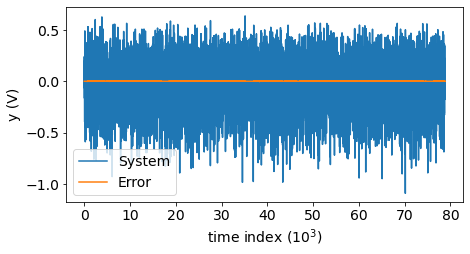

In [8]:
plt.figure(figsize=(9*0.75,5*0.75))
time = np.arange(len(test_encoder_sim))/1000
plt.plot(time,test.y)
plt.plot(time,test.y-test_encoder_sim.y)
plt.legend(['System','Error'])
plt.xlabel('time index ($10^3$)')
plt.ylabel('y (V)')
plt.tight_layout()
plt.savefig(figure_folder+'error-time.pdf')
plt.savefig(figure_folder+'error-time.png',dpi=200)
plt.show()

### Frequency/Fourier domain

#### Load other models

In [9]:
test_BLA_sim = sys_BLA.apply_experiment(test) #simulation
print('BLA test simulation result:')
print(f'  NRMS {test_BLA_sim.NRMS(test):.5%}') #don't know why it is lower than BLA from Lauwers et al 2009. 
print(f'   RMS {test_BLA_sim.RMS(test)*1000:.6}') #don't know why it is lower than BLA from Lauwers et al 2009. 

y_test_NLLFR_res = scipy.io.loadmat('./WH-data/yval-matlab-NL-LFR.mat')['yValSSNNdiff'][:,0] #residual of the NLLFR model
print('\nNLLFR simulation test result:')
print(f'  NRMS {np.mean(y_test_NLLFR_res**2)**0.5/np.std(test.y):.5%}') 
print(f'   RMS {np.mean(y_test_NLLFR_res**2)**0.5*1000:.5}') 

BLA test simulation result:
  NRMS 18.20754%
   RMS 44.4004

NLLFR simulation test result:
  NRMS 0.12059%
   RMS 0.29408


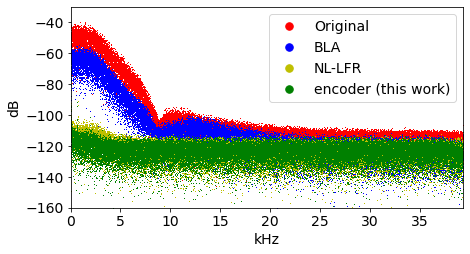

In [11]:
from scipy import fftpack


#two utility function
db = lambda a: 20*np.log10(np.abs(fftpack.fft(a)/len(a))) #convert ot db
Hz = lambda x: np.arange(len(x))/1000 #rescale to kHz
n_skip = 150 #skip transient


#
plt.figure(figsize=(9*0.75,5*0.75))
#original:
ydb = db(test.y[n_skip:]) 
plt.plot(Hz(ydb),ydb,'r,')
#BLA:
ydb = db(test.y[n_skip:]-test_BLA_sim.y[n_skip:]) 
plt.plot(Hz(ydb),ydb,'b,')
#NL-LFR:
ydb = db(y_test_NLLFR_res)
plt.plot(Hz(ydb),ydb,'y,')
#ss-encoder:
ydb = db(test.y[n_skip:]-test_encoder_sim.y[n_skip:])
plt.plot(Hz(ydb),ydb,'g,')

#manual creation of legend (markers dont with with , as marker)
import matplotlib.patches as mpatches
import matplotlib.lines as mlines 
red_line = mlines.Line2D([], [], color='r', marker='.',
                          markersize=15, label='Original',linestyle='None')
blue_line = mlines.Line2D([], [], color='b', marker='.',
                          markersize=15, label='BLA',linestyle='None')
yellow_line = mlines.Line2D([], [], color='y', marker='.',
                          markersize=15, label='NL-LFR',linestyle='None')
green_line = mlines.Line2D([], [], color='g', marker='.',
                          markersize=15, label='encoder (this work)',linestyle='None')
plt.legend(handles=[red_line,blue_line,yellow_line,green_line],loc='upper right')

plt.xlim(0,(len(test)//2-n_skip//2)/1000)
plt.ylabel('dB')
plt.xlabel('kHz')
plt.ylim(-160,-30)
plt.tight_layout()
plt.savefig(figure_folder+'fft.png',dpi=115)
plt.show()

## Training curve figure

### Get other modes of operations 

In [12]:
if False: #train model
    sys_no_encode = deepSI.fit_systems.System_encoder(nx=6,na=1,nb=1) #encoder is used ones to initialize one state, same as parametric start
    sys_no_encode.n_hidden_layers = 1
    sys_no_encode.n_nodes_per_layer = 15
    sys_no_encode.fit(train,epochs=15184,batch_size=1,Loss_kwargs=dict(nf=len(train)-sys.na),sim_val=train[-20000:])
    sys_no_encode.save_system('./WH-data/nx6WH-non-encoder')
else: #load model from file
    sys_no_encode = deepSI.load_system('./WH-data/nx6WH-non-encoder')
    
if False: #train model
    sys_no_batch = deepSI.fit_systems.System_encoder(nx=6,na=50,nb=50) #encoder is used ones to initialize one state, same as parametric start
    sys_no_batch.n_hidden_layers = 1
    sys_no_batch.n_nodes_per_layer = 15
    sys_no_batch.fit(train,epochs=10000,batch_size=99901,Loss_kwargs=dict(nf=80),sim_val=train[-4000:]) #small validation otherwise computation speed is lowered by a lot
    sys_no_batch.save_system('./WH-data/nx6WH-no-batch')
else: #load model from file
    sys_no_batch = deepSI.load_system('./WH-data/nx6WH-no-batch')

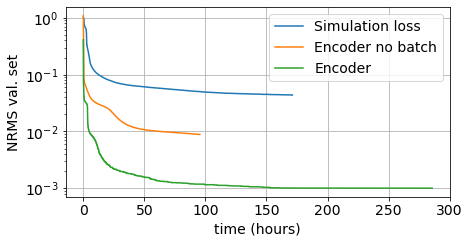

In [13]:
def min_val_array(lis):
    '''Minimum value in to the left'''
    minval = [lis[0]]
    for a in lis[1:]:
        if minval[-1]>a:
            minval.append(a)
        else:
            minval.append(minval[-1])
    return np.array(minval)

plt.figure(figsize=(9*0.75,6*0.6))
label = 'time-compare-2'
plt.grid()

hours = np.array(sys_no_encode.time)/60/60
plt.plot(hours,min_val_array(sys_no_encode.Loss_val),label='Simulation loss')

hours = np.array(sys_no_batch.time)/60/60
plt.plot(hours,min_val_array(sys_no_batch.Loss_val),label='Encoder no batch')

hours = np.array(sys.time[:len(sys.time)//2])/60/60
plt.plot(hours,min_val_array(sys.Loss_val[1:len(sys.time)//2+1]),label='Encoder') #[...+1] is a minor deepSI version mess up correction remove if you retrain the model


plt.xlabel('time (hours)')
plt.legend(loc='upper right')
plt.semilogy()
plt.ylabel('NRMS val. set')
plt.tight_layout()
plt.savefig(figure_folder+f'training-{label}.pdf',dpi=200)
plt.savefig(figure_folder+f'training-{label}.png',dpi=200)
plt.show()

## n-step error

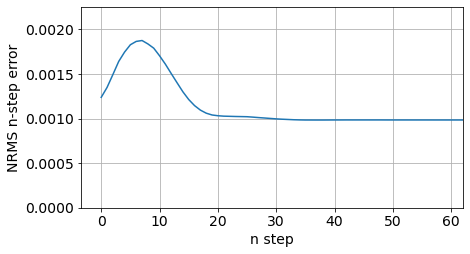

In [14]:
n_step_error = sys.n_step_error(test,nf=70)
plt.figure(figsize=(9*0.75,5*0.75))
plt.plot(n_step_error)
plt.xlabel('n step')
plt.ylabel('NRMS n-step error')
plt.ylim(0,0.00225)
plt.xlim(None,62)
plt.tight_layout()
plt.grid()
plt.savefig(figure_folder+'n-step.pdf')
plt.savefig(figure_folder+'n-step.png',dpi=200)
plt.show()